<a href="https://colab.research.google.com/github/bollimuntha-shreya/Election-Classification/blob/main/Elections_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataframe

In [9]:
import pandas as pd
import io
import glob
import numpy as np
url = 'https://raw.githubusercontent.com/bollimuntha-shreya/Election-Classification/main/All_States_GE.csv'
data = pd.read_csv(url)



<ipython-input-9-83f53c94617e>:6: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


## Data Preprocessing


In [10]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data_pre = data.copy()
data_pre = data_pre.loc[(data_pre['Candidate'] != 'NOTA') & (data_pre['Sex'] != 'NOTA')]

features = ['State_Name', 'Constituency_No', 'Year', 'Turnout_Percentage', 'Party_Type_TCPD', 'Vote_Share_Percentage']

# Drop rows with missing values
data_pre = data_pre.dropna(subset=features)
encoder = OneHotEncoder()
# Encode categorical features
label_encoder = LabelEncoder()
data_pre['State_Name'] = label_encoder.fit_transform(data_pre['State_Name'])
data_pre['Party_Type_TCPD'] = label_encoder.fit_transform(data_pre['Party_Type_TCPD'])


data_pre.head()

,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,0,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,0,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,0,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,0,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,0,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)


##Correlation Matrix

<Axes: >

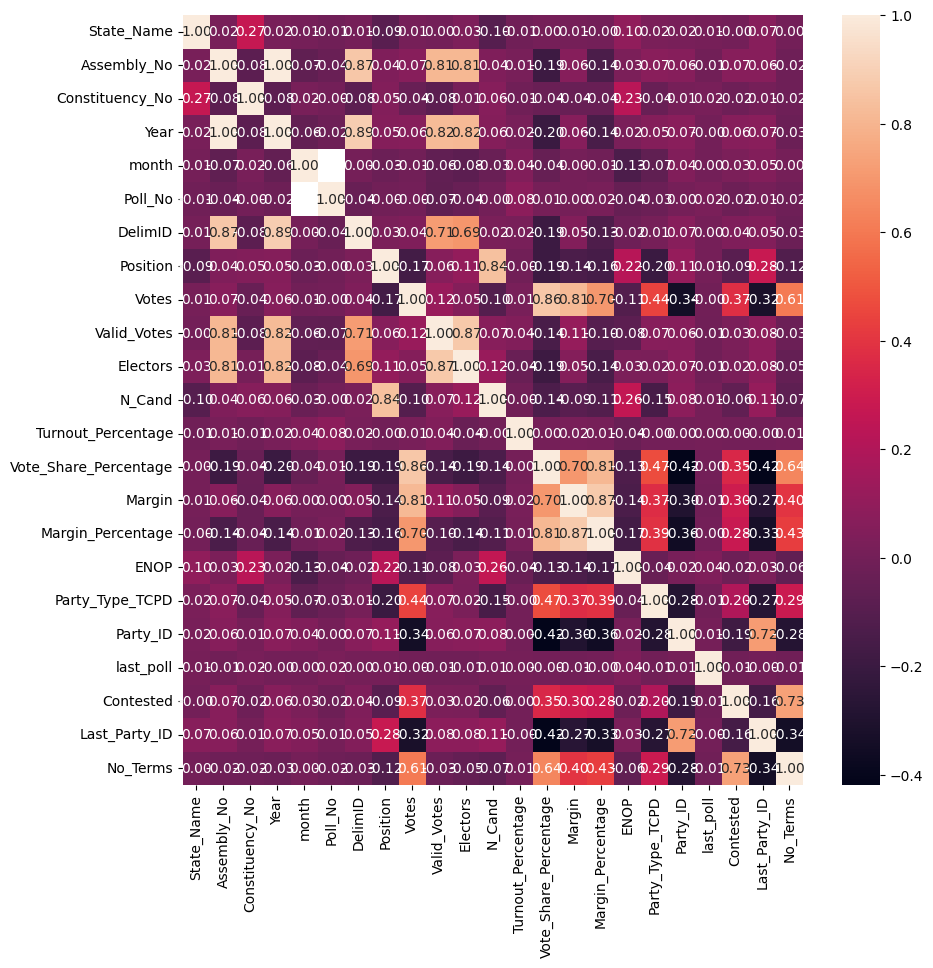

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data_pre.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')

# Classification

####Classification Problem : Predicting the Winning Party in General Elections

Data Split


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Feature Selection: Select relevant features for the classification model
# X = data_pre[['Year', 'month', 'Party', 'Candidate_Type', 'Turnout_Percentage', 'Same_Constituency', 'Same_Party']]
# X = data_pre[['Year','Turnout_Percentage','Constituency_Type','Votes','Vote_Share_Percentage']]
features = ['State_Name', 'Constituency_No', 'Year', 'Turnout_Percentage', 'Party_Type_TCPD', 'Vote_Share_Percentage']
X = data_pre[features]
Y = data_pre['Party']

categorical_features = ['State_Name', 'Party_Type_TCPD']
encoder = OneHotEncoder()
# Encode categorical features
label_encoder = LabelEncoder()
X['State_Name'] = label_encoder.fit_transform(X['State_Name'])
X['Party_Type_TCPD'] = label_encoder.fit_transform(X['Party_Type_TCPD'])

# print(np.shape(X))
# X_test.fillna(X_train.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.head()
# X_train_encoded = encoder.fit_transform(X_train[categorical_features])
# X_test_encoded = encoder.transform(X_test[categorical_features])

# X_train_final = pd.concat([X_train.drop(categorical_features, axis=1), pd.DataFrame(X_train_encoded.toarray())], axis=1)
# X_test_final = pd.concat([X_test.drop(categorical_features, axis=1), pd.DataFrame(X_test_encoded.toarray())], axis=1)


<ipython-input-22-ecafb7d28b9c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['State_Name'] = label_encoder.fit_transform(X['State_Name'])
<ipython-input-22-ecafb7d28b9c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Party_Type_TCPD'] = label_encoder.fit_transform(X['Party_Type_TCPD'])


,State_Name,Constituency_No,Year,Turnout_Percentage,Party_Type_TCPD,Vote_Share_Percentage
0,0,1,2019,65.09,2,45.98
1,0,1,2019,65.09,2,45.30
2,0,1,2019,65.09,0,2.58
3,0,1,2019,65.09,4,1.37
4,0,1,2019,65.09,4,1.20


1. Logistic Regression

In [23]:
# logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# classification report
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on test set: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

          A S P       0.00      0.00      0.00         1
           AAAP       0.00      0.00      0.00        86
         AABHAP       0.00      0.00      0.00         1
         AAHPty       0.00      0.00      0.00         1
            AAM       0.00      0.00      0.00         1
           AAPP       0.00      0.00      0.00         2
             AB       0.00      0.00      0.00         1
           ABAS       0.00      0.00      0.00         2
          ABBNS       0.00      0.00      0.00         1
           ABBP       0.00      0.00      0.00         4
        ABCD(A)       0.00      0.00      0.00         3
          ABDBM       0.00      0.00      0.00         1
           ABDD       0.00      0.00      0.00         1
           ABDM       0.00      0.00      0.00         1
          ABGLP       0.00      0.00      0.00         1
           ABGP       0.00      0.00      0.00         1
           ABHM       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Naive Bayes

In [ ]:
# # # naive bayes
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# classification reportimport seaborn as sns
print(classification_report(y_test, y_pred))



Accuracy of naive bayes classifier on test set: 0.65
[[ 0  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

          A S P       0.00      0.00      0.00         1
           AAAP       0.33      0.16      0.22        86
         AABHAP       0.00      0.00      0.00         1
         AAHPty       0.00      0.00      0.00         1
            AAM       0.00      0.00      0.00         1
           AAPP       0.00      0.00      0.00         2
             AB       0.00      0.00      0.00         1
           ABAS       0.00      0.00      0.00         2
          ABBNS       0.17      1.00      0.29         1
           ABBP       0.00      0.00      0.00         4
        ABCD(A)       0.00      0.00      0.00         3
            ABD       0.00      0.00      0.00         0
          ABDBM       0.00      0.00      0.00         1
           ABDD       0.14      1.00      0.25         1
           ABDM       0.00      0.00      0.00         1
          ABDUP       0.00      0.00      0.00         0
          ABGLP       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

3. k-Nearest Neighbors

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print('Accuracy of knn classifier on test set:{:.2f} '.format(knn.score(X_test, y_test)))
# classification report
print(classification_report(y_test, y_pred))

Accuracy of knn classifier on test set:0.64 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

          A S P       0.00      0.00      0.00         1
           AAAP       0.33      0.16      0.22        86
         AABHAP       0.00      0.00      0.00         1
         AAHPty       0.00      0.00      0.00         1
            AAM       0.00      0.00      0.00         1
           AAPP       0.00      0.00      0.00         2
             AB       0.00      0.00      0.00         1
           ABAS       0.00      0.00      0.00         2
          ABBNS       0.17      1.00      0.29         1
           ABBP       0.00      0.00      0.00         4
        ABCD(A)       0.00      0.00      0.00         3
            ABD       0.00      0.00      0.00         0
          ABDBM       0.00      0.00      0.00         1
           ABDD       0.14      1.00      0.25         1
           ABDM       0.00      0.00      0.00         1
          ABDUP       0.00      0.00      0.00         0
          ABGLP       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

4. Decision Tree

Accuracy of decision tree classifier on test set: 0.74


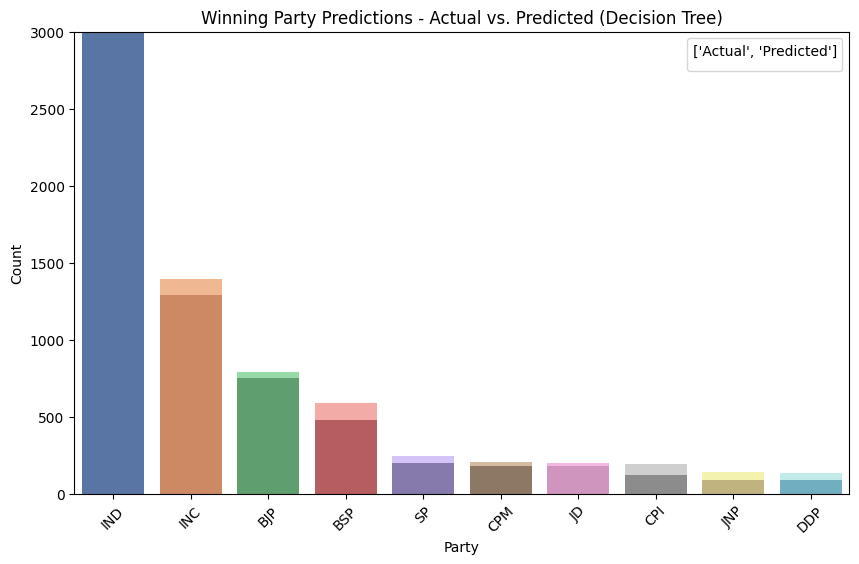

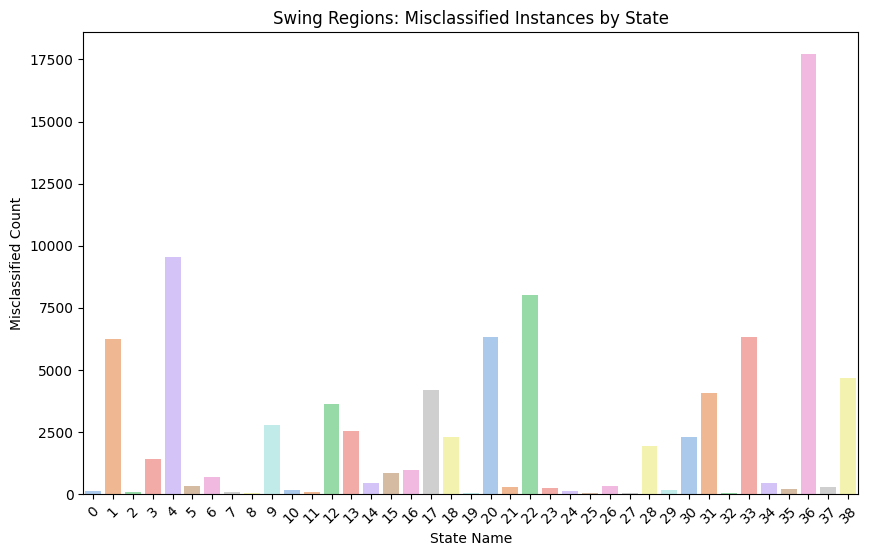

<ipython-input-20-c3c504f56e4b>:97: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Position', hue='Party', data=top_10_data, ci=None,order=unique_years)


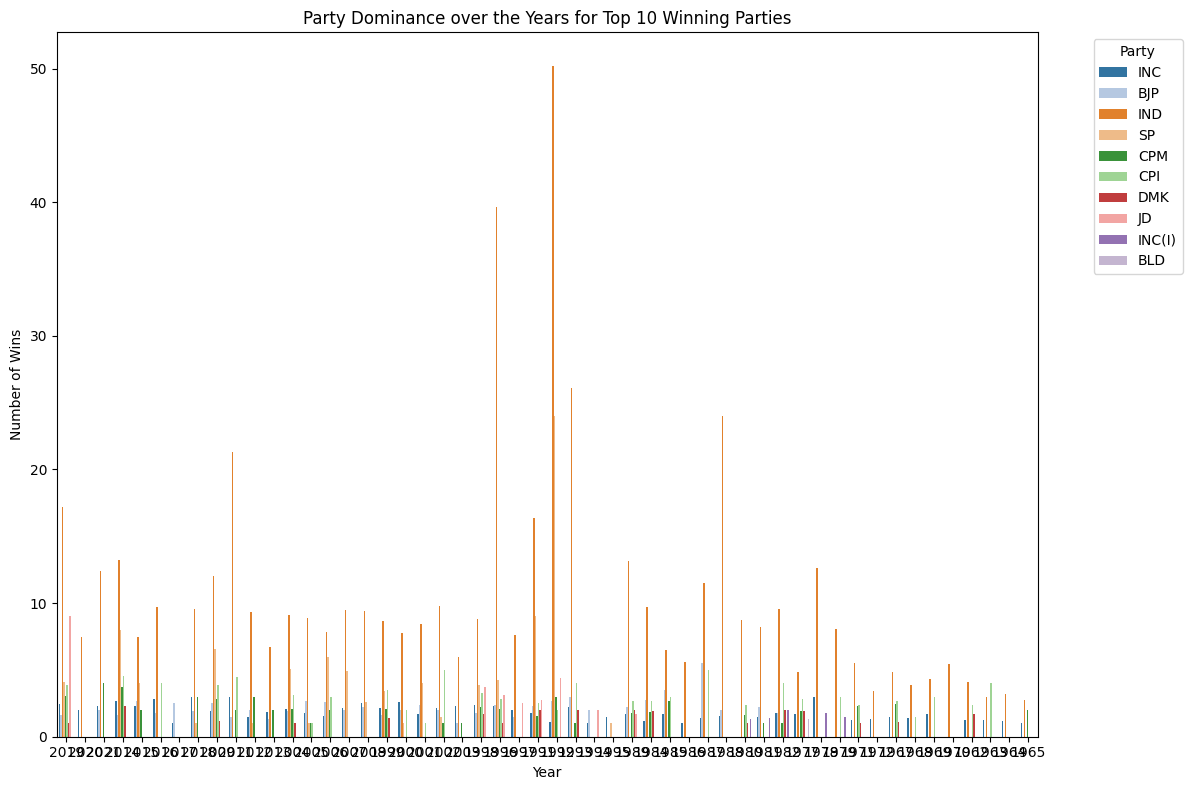

In [20]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# classification report
print(classification_report(y_test, y_pred))


## INSIGHT 1 : Winning Party Predictions

# Calculate the frequency of each party in the test set
party_counts = y_test.value_counts()

# Select the top 5 parties based on their frequency
top_10_parties = party_counts.nlargest(10).index

# Filter the test set to include only the top 10 parties
y_test_filtered = y_test[y_test.isin(top_10_parties)]
y_pred_filtered = pd.Series(y_pred, index=y_test.index)[y_test_filtered.index]

# Plot the Winning Party Predictions for the top 10 parties
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test_filtered, palette='pastel', order=top_10_parties)
sns.countplot(x=y_pred_filtered, palette='deep', order=top_10_parties)
plt.title("Winning Party Predictions - Actual vs. Predicted (Decision Tree)")
plt.xlabel("Party")
plt.ylabel("Count")
plt.legend(title=["Actual", "Predicted"], loc="upper right")
plt.xticks(rotation=45)

# Set y-axis limit to accommodate party values within 2000
plt.ylim(0, 3000)

plt.show()

# Independents 9700

##INSIGHT 2 : Swing Regions

## Compare actual and predicted winning parties
misclassified_df = pd.DataFrame({'Actual_Winning_Party': y_test, 'Predicted_Winning_Party': y_pred})
misclassified_df['Misclassified'] = misclassified_df['Actual_Winning_Party'] != misclassified_df['Predicted_Winning_Party']

# Filter the misclassified instances (swing regions)
swing_regions = misclassified_df[misclassified_df['Misclassified']]

# Plot Swing Regions
plt.figure(figsize=(10, 6))
sns.countplot(x=data_pre['State_Name'], data=swing_regions, palette='pastel')
plt.title("Swing Regions: Misclassified Instances by State")
plt.xlabel("State Name")
plt.ylabel("Misclassified Count")
plt.xticks(rotation=45)
plt.show()


# We then train the Decision Tree Classifier on the training data and make predictions on the test data.
# We compare the actual winning party with the predicted winning party and create the misclassified_df DataFrame to store this information.
# The Misclassified column in this DataFrame will be True for misclassified instances (where the actual and predicted winning parties are different) and False otherwise.

# The misclassified instances in the classification problem can provide insights into swing regions,
#  where the winning party is not as predictable.
#  Identifying such regions can be essential for political strategists and parties to focus their campaign efforts and resources more effectively.





## INSIGHT 3 : Party Dominance

# Group data by Party and calculate the number of terms won by each party
party_wins = data[data['Position'] == 1].groupby('Party')['No_Terms'].sum().reset_index()

# Sort parties based on number of wins in descending order to get top 10 parties
top_10_parties = party_wins.sort_values(by='No_Terms', ascending=False).head(10)

# Filter data for only the top 10 winning parties
top_10_data = data[data['Party'].isin(top_10_parties['Party'])]
# Get the unique years present in the dataset
unique_years = top_10_data['Year'].unique()

# Plot Party Dominance over the Years for Top 10 Winning Parties
plt.figure(figsize=(12, 8))
sns.set_palette("tab20")  # Set color palette
sns.barplot(x='Year', y='Position', hue='Party', data=top_10_data, ci=None,order=unique_years)
plt.title("Party Dominance over the Years for Top 10 Winning Parties")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# The classification model can reveal which political parties have been consistently dominant in specific regions or constituencies over time.
# This insight can be crucial for understanding the political landscape and identifying strongholds of particular parties.
